# Лабороторная работа 2. Вариант 3. 
Алгоритмы поиска  
Поиск: линейный, бинарный (для массива до и после сортировки)

In [17]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
sns.set(style="darkgrid")

In [18]:
sizes_of_dataset = np.array(
    [100, 500, 1000, 5000, 10000, 30000, 50000, 100000]) #объем данных

## Класс и перегрузка операторов 

In [47]:
class Accounting:
    """
    Класс из ЛР1
    """
    def __init__(self, name, position, place, salary):
        self.name = name
        self.position = position
        self.place = place
        self.salary = salary

    def __eq__(self, other):
        if self.name == other:
            return True
        return False

    def __gt__(self, other):
        if self.name >= other:
            return True
        return False

    def __ge__(self, other):
        if self.name > other:
            return True
        return False

    def __le__(self, other):
        if self.name < other:
            return True
        return False

    def __lt__(self, other):
        if self.name <= other:
            return True
        return False

    def __repr__(self):
        return '%r' % self.__dict__

## Алгоритмы поиска 

In [20]:
def linearsearch(data, strop):
    """ Алгоритм линейного  поиска
        data - массив данных
        strop - искомый элемент
        linearsearch(data,strop) -> None
    """
    for i in data:
        if i == strop:
            print(i)


def binsearch(data, strop):
    """Алгоритм бирарного поиска
        data - массив данных
        strop - искомый элемент
        binsearch(data,strop) -> None
    
    """
    if len(data) == 0:
        return 0
    middle = len(data) // 2
    if data[middle] == strop:
        print(data[middle])
    if data[middle] >= strop:
        binsearch(data[:middle], strop)
    if data[middle] <= strop:
        binsearch(data[middle + 1:], strop)

In [21]:
print(linearsearch.__doc__)
print(binsearch.__doc__)

 Алгоритм линейного  поиска
        data - массив данных
        strop - искомый элемент
        linearsearch(data,strop) -> None
    
Алгоритм бирарного поиска
        data - массив данных
        strop - искомый элемент
        binsearch(data,strop) -> None
    
    


In [22]:
def merge_sort(data):
    """
    Алгоритм сортировки слиянием
    """
    if len(data) > 1:
        middle = len(data) // 2
        lefthalf = data[:middle]
        righthalf = data[middle:]
        merge_sort(lefthalf)
        merge_sort(righthalf)
        i = 0
        j = 0
        count = 0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                data[count] = lefthalf[i]
                i = i + 1
            else:
                data[count] = righthalf[j]
                j = j + 1
            count = count + 1

        while i < len(lefthalf):
            data[count] = lefthalf[i]
            i = i + 1
            count = count + 1

        while j < len(righthalf):
            data[count] = righthalf[j]
            j = j + 1
            count = count + 1
    return data

## Поиск 

In [48]:
sizes_of_dataset = np.array(
    [100, 500, 1000, 5000, 10000, 30000, 50000, 100000])
binsearch_in_unsorted, binsearch_in_sorted, linear_search_time = [], [], []
for size_of_data in sizes_of_dataset:
    df = pd.read_csv(f'Data/dataset{size_of_data}.csv', encoding='cp1251')
    findings = random.choice(df['ФИО'])
    print(f'Датафрейм объема {size_of_data}, ищем {findings}'.center(80, '-'))
    list_of_classes = []
    for i in range(1, len(df)):
        strin = df.iloc[i]
        list_of_classes.append(
            Accounting(name=strin['ФИО'],
                       position=strin['Должность'],
                       place=strin['Подразделение'],
                       salary=strin['Зарплата']))

    print('Бинарный поиск с сортировкой')
    start_time = time.time()
    list_of_classes_sorted = merge_sort(list_of_classes)
    binsearch(list_of_classes_sorted, findings)
    zx = time.time() - start_time
    binsearch_in_unsorted.append(zx)

    print('Линейный поиск')
    start_time = time.time()
    linearsearch(list_of_classes, findings)
    zy = time.time() - start_time
    linear_search_time.append(zy)

    print('Бинарный поиск в отсортированном')
    start_time = time.time()
    binsearch(list_of_classes_sorted, findings)
    zz = time.time() - start_time
    binsearch_in_sorted.append(zz)

-------------Датафрейм объема 100, ищем Гаврилова Стоян Васильевич--------------
Бинарный поиск с сортировкой
{'name': 'Гаврилова Стоян Васильевич', 'position': 'middle', 'place': 'fobut', 'salary': 34124}
Линейный поиск
{'name': 'Гаврилова Стоян Васильевич', 'position': 'middle', 'place': 'fobut', 'salary': 34124}
Бинарный поиск в отсортированном
{'name': 'Гаврилова Стоян Васильевич', 'position': 'middle', 'place': 'fobut', 'salary': 34124}
----------------Датафрейм объема 500, ищем Лукина Софон Львовна-----------------
Бинарный поиск с сортировкой
{'name': 'Лукина Софон Львовна', 'position': 'senior', 'place': 'yfuhl', 'salary': 42475}
Линейный поиск
{'name': 'Лукина Софон Львовна', 'position': 'senior', 'place': 'yfuhl', 'salary': 42475}
Бинарный поиск в отсортированном
{'name': 'Лукина Софон Львовна', 'position': 'senior', 'place': 'yfuhl', 'salary': 42475}
---------------Датафрейм объема 1000, ищем Евсеева Остап Фролович---------------
Бинарный поиск с сортировкой
{'name': 'Евсеев

## График скорости выполнения 

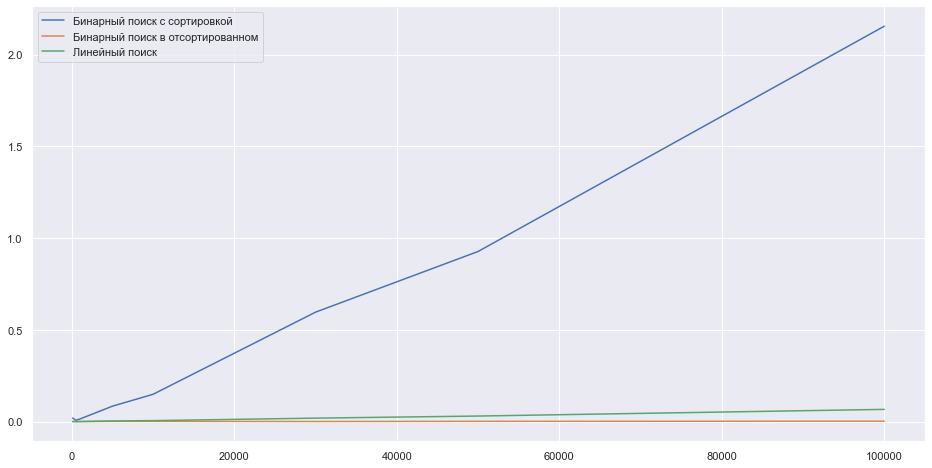

In [41]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(sizes_of_dataset,
        binsearch_in_unsorted,
        label='Бинарный поиск с сортировкой')
ax.plot(sizes_of_dataset,
        binsearch_in_sorted,
        label='Бинарный поиск в отсортированном')
ax.plot(sizes_of_dataset, linear_search_time, label='Линейный поиск')
ax.legend()

## Ассоциативный массив 

In [36]:
multimap_time = []
for size_of_data in sizes_of_dataset:
    dictionary = {}
    df = pd.read_csv(f'Data/dataset{size_of_data}.csv', encoding='cp1251')
    findings = random.choice(df['ФИО'])
    for i in range(len(df)):
        if df['ФИО'][i] in dictionary:
            dictionary[df['ФИО'][i]].append([
                df['Должность'][i], df['Подразделение'][i], df['Зарплата'][i]
            ])
        else:
            dictionary[df['ФИО'][i]] = [
                df['Должность'][i], df['Подразделение'][i], df['Зарплата'][i]
            ]
    start_time = time.time()
    x = dictionary.get(findings,'Такого ФИО не сущесвует')
    zx = time.time() - start_time
    multimap_time.append(zx)
    print(f'Датафрейм объема {size_of_data}, ищем {findings}'.center(80, '-'))
    print(dictionary[findings])

------------Датафрейм объема 100, ищем Фролов Твердислав Даниилович-------------
['junior', 'sjqqj', 25223]
--------------Датафрейм объема 500, ищем Блохин Варлаам Робертовна--------------
['senior', 'jlzdn', 26969]
-------------Датафрейм объема 1000, ищем Цветкова Людмила Сергеевна-------------
['junior', 'uahdy', 35259]
------------Датафрейм объема 5000, ищем Филиппова Порфирий Ефимович-------------
['middle', 'bdskc', 32685]
-------------Датафрейм объема 10000, ищем Шилова Парамон Чеславович-------------
['junior', 'sqsxv', 19014]
-----------Датафрейм объема 30000, ищем Белоусова Валентин Сергеевна------------
['junior', 'fqgvy', 29205]
-------------Датафрейм объема 50000, ищем Власова Август Германович-------------
['middle', 'yzwcm', 20176]
------------Датафрейм объема 100000, ищем Лебедева Федор Аркадьевна-------------
['senior', 'guwcf', 38912]


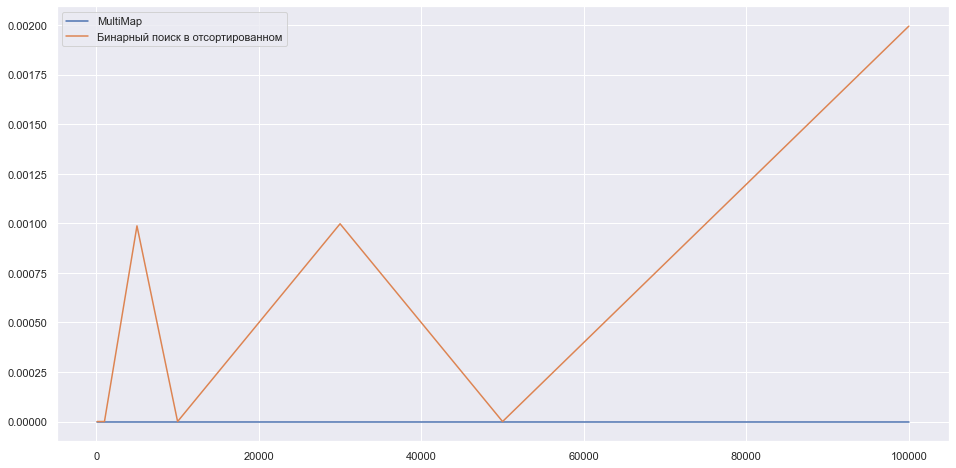

In [53]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(sizes_of_dataset, multimap_time, label='MultiMap')
ax.plot(sizes_of_dataset,
        binsearch_in_sorted,
        label='Бинарный поиск в отсортированном')
ax.legend()